In [40]:
import pandas as pd
import numpy as np
import sklearn.preprocessing

import seaborn as sns

In [135]:
data = pd.read_csv('../data/data_flats.csv',sep=";")
data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   sub_area                               30469 non-null  object 
 5   preschool_quota                        23781 non-null  float64
 6   preschool_education_centers_raion      30469 non-null  int64  
 7   school_quota                           23784 non-null  float64
 8   school_education_centers_raion         30469 non-null  int64  
 9   school_education_centers_top_20_raion  30469 non-null  int64  
 10  hospital_beds_raion                    16029 non-null  float64
 11  he

In [105]:
data_subset = data[data.sub_area.isin(['Basmannoe', 'Perovo', 'Lefortovo', 'Bogorodskoe'])]

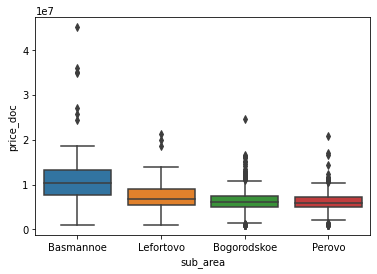

In [106]:
sns.boxplot(data=data_subset, x='sub_area', y='price_doc');

In [139]:
ecology_dict = {'no data': 0, 'poor': 1, 'satisfactory': 2, 'good': 3, 'excellent': 4}

In [126]:
# data.ecology = data.ecology.map(ecology_dict)

In [140]:
# OR
data.ecology = data.ecology.replace(to_replace=ecology_dict)

In [142]:
dummies = pd.get_dummies(data.sub_area, drop_first=False)

In [143]:
final_df = pd.concat([data, dummies], axis=1).drop('sub_area', axis=1)

In [145]:
round(final_df.ecology.mean(), 2)

1.73

In [95]:
subareas_with_freqs = data.sub_area.value_counts().to_list()
top_subareas_count = int(np.percentile(subareas_with_freqs, 90))

In [101]:
all_subareas = data.sub_area.value_counts()[data.sub_area.value_counts() > top_subareas_count].index
all_subareas

Index(['Poselenie Sosenskoe', 'Nekrasovka', 'Poselenie Vnukovskoe',
       'Poselenie Moskovskij', 'Poselenie Voskresenskoe', 'Mitino', 'Tverskoe',
       'Krjukovo', 'Mar'ino', 'Poselenie Filimonkovskoe', 'Juzhnoe Butovo',
       'Poselenie Shherbinka', 'Solncevo', 'Zapadnoe Degunino',
       'Poselenie Desjonovskoe'],
      dtype='object')

In [103]:
data.loc[~data.sub_area.isin(all_subareas), 'sub_area'] = 'Other'

***

In [10]:
train_data = pd.read_csv("../data/train.csv", encoding = 'ISO-8859-1', low_memory = False)
train_data.head()

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
3,22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
4,22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


In [44]:
train_data_balance = train_data.balance_due.values.reshape((250306,1))

In [45]:
std_scaler = sklearn.preprocessing.StandardScaler()
output = std_scaler.fit_transform(train_data_balance)

In [46]:
round(output.min(), 5)

-13.14733

In [30]:
balance_sqrt = np.sqrt(train_data[train_data.balance_due>0].balance_due)

In [34]:
round(np.abs(balance_sqrt.mean() - balance_sqrt.median()), 6)

0.452596

In [52]:
pf = sklearn.preprocessing.PolynomialFeatures(3)
pf3_output = pf.fit_transform(train_data[['balance_due', 'payment_amount']])

In [64]:
pf3_output.mean(axis=0).argmax()

6

In [68]:
for each in train_data.columns:
    if 'date' in each:
        print(each)

ticket_issued_date
hearing_date
payment_date


In [71]:
train_data.ticket_issued_date = pd.to_datetime(train_data.ticket_issued_date)

In [74]:
sum(train_data.ticket_issued_date.dt.weekday > 4)

1620

In [163]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))[0]

outliers_index = outliers_iqr(train_data.balance_due.dropna())

In [164]:
train_data_balance_removed_outliers = train_data.loc[~train_data.index.isin(outliers_index), 'balance_due']

In [165]:
train_data_balance_removed_outliers.max() - train_data_balance_removed_outliers.min()

1201.3